# Imports

In [1]:
import pandas as pd
import numpy as np
import xlrd
import os, sys
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, TimeDistributed, \
Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from statistics import mean, stdev
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score
from collections import Counter 

# Data Engineering (Feature Development and Data Matching)

In [7]:
# x_dfs_names = ['X Acc', 'Y Acc', 'Z Acc', 'X Gyr', 'Y Gyr', 'Z Gyr']
# window_num = 11  # window width = 2*window_num - 1
# window_num_1 = window_num - 1
# window_num_2 = window_num - 2

# file_names = list(os.listdir(os.getcwd() + "/TrainingData"))
# for i in range(int(len(file_names)/4)):
# # for i in range(1):
#     x = pd.read_csv(os.getcwd() + "\\TrainingData\\" + file_names[4*i], names=x_dfs_names)
#     x_time = list(pd.read_csv(os.getcwd() + "\\TrainingData\\" + file_names[4*i+1], names=['Time'])['Time'])
#     y = list(pd.read_csv(os.getcwd() + "\\TrainingData\\" + file_names[4*i+2], names=['Label'])['Label'])
#     y_time = list(pd.read_csv(os.getcwd() + "\\TrainingData\\" + file_names[4*i+3], names=['Time'])['Time'])
    
#     xacc = list(x['X Acc'])
#     beef = list(x['Y Acc'])  # yacc
#     zacc = list(x['Z Acc'])
#     xgyr = list(x['X Gyr'])
#     ygyr = list(x['Y Gyr'])
#     zgyr = list(x['Z Gyr'])
    
#     # Initialize all of these with 0 pad since they will lose a point during calculation
#     xjerk = [0]
#     jerky = [0]  # yjerk
#     zjerk = [0]
#     xangacc = [0]
#     yangacc = [0]
#     zangazz = [0]  #zangacc
    
#     time_diff = (x_time[1]-x_time[0])
#     for j in range(1, len(xacc)):
#         # aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaang
#         xjerk.append((xacc[j]-xacc[j-1])/time_diff)
#         jerky.append((beef[j]-beef[j-1])/time_diff)  # derivative of beef = jerky
#         zjerk.append((zacc[j]-zacc[j-1])/time_diff)
#         xangacc.append((xgyr[j]-xgyr[j-1])/time_diff)
#         yangacc.append((ygyr[j]-ygyr[j-1])/time_diff)
#         zangazz.append((zgyr[j]-zgyr[j-1])/time_diff)
    
#     # Padding needed for a 20 window size
#     padding = [0] * 19
#     xacc = padding + xacc + padding
#     beef = padding + beef + padding # yacc
#     zacc = padding + zacc + padding
#     xgyr = padding + xgyr + padding
#     ygyr = padding + ygyr + padding
#     zgyr = padding + zgyr + padding
#     xjerk = padding + xjerk + padding
#     jerky = padding + jerky + padding  # yjerk
#     zjerk = padding + zjerk + padding
#     xangacc = padding + xangacc + padding
#     yangacc = padding + yangacc + padding
#     zangazz = padding + zangazz + padding  #zangacc
    
#     xaccavg = []
#     beefavg = []  # yacc
#     zaccavg = []
#     xgyravg = []
#     ygyravg = []
#     zgyravg = []
#     xjerkavg = []
#     jerkyavg = []  # yjerk
#     zjerkavg = []
#     xangaccavg = []
#     yangaccavg = []
#     zangazzavg = [] #zangacc
    
#     xaccstd = []
#     beefstd = []  # yacc
#     zaccstd = []
#     xgyrstd = []
#     ygyrstd = []
#     zgyrstd = []
#     xjerkstd = []
#     jerkystd = []  # yjerk
#     zjerkstd = []
#     xangaccstd = []
#     yangaccstd = []
#     zangazzstd = [] #zangacc

# #     print(len(xacc)+2*window_num_1)
# #     print(xacc[window_num-window_num:window_num+window_num_1])
# #     print(window_num+window_num_1)
#     for j in range(window_num, len(xacc)+window_num_1):
#         xaccavg.append(mean(xacc[j-window_num:j+window_num_1]))
#         beefavg.append(mean(beef[j-window_num:j+window_num_1]))
#         zaccavg.append(mean(zacc[j-window_num:j+window_num_1]))
#         xgyravg.append(mean(xgyr[j-window_num:j+window_num_1]))
#         ygyravg.append(mean(ygyr[j-window_num:j+window_num_1]))
#         zgyravg.append(mean(zgyr[j-window_num:j+window_num_1]))
#         xjerkavg.append(mean(xjerk[j-window_num:j+window_num_1]))
#         jerkyavg.append(mean(jerky[j-window_num:j+window_num_1]))
#         zjerkavg.append(mean(zjerk[j-window_num:j+window_num_1]))
#         xangaccavg.append(mean(xangacc[j-window_num:j+window_num_1]))
#         yangaccavg.append(mean(yangacc[j-window_num:j+window_num_1]))
#         zangazzavg.append(mean(zangazz[j-window_num:j+window_num_1]))

#         xaccstd.append(stdev(xacc[j-window_num:j+window_num_1]))
#         beefstd.append(stdev(beef[j-window_num:j+window_num_1]))
#         zaccstd.append(stdev(zacc[j-window_num:j+window_num_1]))
#         xgyrstd.append(stdev(xgyr[j-window_num:j+window_num_1]))
#         ygyrstd.append(stdev(ygyr[j-window_num:j+window_num_1]))
#         zgyrstd.append(stdev(zgyr[j-window_num:j+window_num_1]))
#         xjerkstd.append(stdev(xjerk[j-window_num:j+window_num_1]))
#         jerkystd.append(stdev(jerky[j-window_num:j+window_num_1]))
#         zjerkstd.append(stdev(zjerk[j-window_num:j+window_num_1]))
#         xangaccstd.append(stdev(xangacc[j-window_num:j+window_num_1]))
#         yangaccstd.append(stdev(yangacc[j-window_num:j+window_num_1]))
#         zangazzstd.append(stdev(zangazz[j-window_num:j+window_num_1]))
    
#     # Additional Safe ending padding
#     end_padding = [0] * window_num
    
#     # For "original" features, keep a padding of 18 0's  --  two points + 18 0's are for first label
#     xacc = xacc[1:] + end_padding
#     beef = beef[1:] + end_padding  # yacc
#     zacc = zacc[1:] + end_padding
#     xgyr = xgyr[1:] + end_padding
#     ygyr = ygyr[1:] + end_padding
#     zgyr = zgyr[1:] + end_padding
#     xjerk = xjerk[1:] + end_padding
#     jerky = jerky[1:] + end_padding  # yjerk
#     zjerk = zjerk[1:] + end_padding
#     xangacc = xangacc[1:] + end_padding
#     yangacc = yangacc[1:] + end_padding
#     zangazz = zangazz[1:] + end_padding  #zangacc
    
#     # Padding for average and stdev features
#     padding2 = [0] * window_num_2
#     xaccavg = padding2 + xaccavg + end_padding
#     beefavg = padding2 + beefavg + end_padding  # yacc
#     zaccavg = padding2 + zaccavg + end_padding
#     xgyravg = padding2 + xgyravg + end_padding
#     ygyravg = padding2 + ygyravg + end_padding
#     zgyravg = padding2 + zgyravg + end_padding
#     xjerkavg = padding2 + xjerkavg + end_padding
#     jerkyavg = padding2 + jerkyavg + end_padding  # yjerk
#     zjerkavg = padding2 + zjerkavg + end_padding
#     xangaccavg = padding2 + xangaccavg + end_padding
#     yangaccavg = padding2 + yangaccavg + end_padding
#     zangazzavg = padding2 + zangazzavg + end_padding #zangacc
    
#     xaccstd = padding2 + xaccstd + end_padding
#     beefstd = padding2 + beefstd + end_padding  # yacc
#     zaccstd = padding2 + zaccstd + end_padding
#     xgyrstd = padding2 + xgyrstd + end_padding
#     ygyrstd = padding2 + ygyrstd + end_padding
#     zgyrstd = padding2 + zgyrstd + end_padding
#     xjerkstd = padding2 + xjerkstd + end_padding
#     jerkystd = padding2 + jerkystd + end_padding  # yjerk
#     zjerkstd = padding2 + zjerkstd + end_padding
#     xangaccstd = padding2 + xangaccstd + end_padding
#     yangaccstd = padding2 + yangaccstd + end_padding
#     zangazzstd = padding2 + zangazzstd + end_padding #zangacc
    
#     X_data = []
#     y_data = []
# #     print(xacc[window_num_1-window_num_1:window_num_1+window_num])
# #     print(xacc[4*len(y_time)+window_num_2-window_num_1:4*len(y_time)+window_num_2+window_num])
#     for j in range(window_num_1, 4*len(y_time)+window_num_1, 4):
#         new_img = np.column_stack([xacc[j-window_num_1:j+window_num], beef[j-window_num_1:j+window_num], 
#                                    zacc[j-window_num_1:j+window_num], xgyr[j-window_num_1:j+window_num], 
#                                    ygyr[j-window_num_1:j+window_num], zgyr[j-window_num_1:j+window_num], 
#                                    xjerk[j-window_num_1:j+window_num], jerky[j-window_num_1:j+window_num], 
#                                    zjerk[j-window_num_1:j+window_num], xangacc[j-window_num_1:j+window_num], 
#                                    yangacc[j-window_num_1:j+window_num], zangazz[j-window_num_1:j+window_num], 
#                                    xaccavg[j-window_num_1:j+window_num], beefavg[j-window_num_1:j+window_num], 
#                                    zaccavg[j-window_num_1:j+window_num], xgyravg[j-window_num_1:j+window_num], 
#                                    ygyravg[j-window_num_1:j+window_num], zgyravg[j-window_num_1:j+window_num], 
#                                    xjerkavg[j-window_num_1:j+window_num], jerkyavg[j-window_num_1:j+window_num], 
#                                    zjerkavg[j-window_num_1:j+window_num], xangaccavg[j-window_num_1:j+window_num], 
#                                    yangaccavg[j-window_num_1:j+window_num], zangazzavg[j-window_num_1:j+window_num], 
#                                  xaccstd[j-window_num_1:j+window_num], beefstd[j-window_num_1:j+window_num], 
#                                    zaccstd[j-window_num_1:j+window_num], xgyrstd[j-window_num_1:j+window_num], 
#                                  ygyrstd[j-window_num_1:j+window_num], zgyrstd[j-window_num_1:j+window_num], 
#                                    xjerkstd[j-window_num_1:j+window_num], jerkystd[j-window_num_1:j+window_num], 
#                                  zjerkstd[j-window_num_1:j+window_num], xangaccstd[j-window_num_1:j+window_num], 
#                                    yangaccstd[j-window_num_1:j+window_num], zangazzstd[j-window_num_1:j+window_num]])
#         X_data.append(new_img)
#     string = ''
#     for j in range(len(X_data)):
#         string += "x" + str(j) + "=X_data[" + str(j) + "], "
# #     string = "np.savez('Convolutional_Data/Xdata" + str(i) + ".npz', " + string[0:-2] + ")"
#     string = "np.savez('Convolutional_Data_v2/Xdata" + str(i) + ".npz', " + string[0:-2] + ")"
#     exec(string)
#     print('Done with Trial: ', i)


Done with Trial:  0
Done with Trial:  1
Done with Trial:  2
Done with Trial:  3
Done with Trial:  4
Done with Trial:  5
Done with Trial:  6
Done with Trial:  7
Done with Trial:  8
Done with Trial:  9
Done with Trial:  10
Done with Trial:  11
Done with Trial:  12
Done with Trial:  13
Done with Trial:  14
Done with Trial:  15
Done with Trial:  16
Done with Trial:  17
Done with Trial:  18
Done with Trial:  19
Done with Trial:  20
Done with Trial:  21
Done with Trial:  22
Done with Trial:  23
Done with Trial:  24
Done with Trial:  25
Done with Trial:  26
Done with Trial:  27
Done with Trial:  28


In [8]:
X_data = []
y_data = []
for i in range(int(len(file_names)/4)):
# for i in range(1):
#     array_dict = np.load("Convolutional_Data/Xdata" + str(i) + ".npz")
    array_dict = np.load("Convolutional_Data_v2/Xdata" + str(i) + ".npz")
    for j in list(array_dict.keys()):
        X_data.append(array_dict[j])
    array_dict.close()
    y = list(pd.read_csv(os.getcwd() + "\\TrainingData\\" + file_names[4*i+2], names=['Label'])['Label'])
    y_data += y

X_data = np.array(X_data)
y_data = np.array(y_data)

In [9]:
counts = pd.DataFrame(y_data)[0].value_counts()
print("Initial Value Counts for y_data\n", counts)
min_class = np.argmin(counts)
min_class_count = counts[min_class]

min_class_idxs = list(np.where(y_data == min_class)[0])
classmaj1 = np.where(y_data == 0)[0]
classmaj2 = np.where(y_data == 3)[0]
classmaj3 = np.where(y_data == 2)[0]

import random
classmaj1_chosen_idxs = random.sample(list(classmaj1), min_class_count)
classmaj2_chosen_idxs = random.sample(list(classmaj2), min_class_count)
classmaj3_chosen_idxs = random.sample(list(classmaj3), min_class_count)

chosen_idxs = min_class_idxs + classmaj1_chosen_idxs + classmaj2_chosen_idxs + classmaj3_chosen_idxs
chosen_idxs.sort()
X_sm = []
y_sm = []
for i in chosen_idxs:
    X_sm.append(X_data[i, :, :])
    y_sm.append(y_data[i])

X_sm = np.array(X_sm)
y_sm = np.array(y_sm)
print(X_sm.shape)
print(y_sm.shape)

Initial Value Counts for y_data
 0    251733
3     51609
2     18267
1     13804
Name: 0, dtype: int64


C:\Users\Alexander\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


(55216, 21, 36)
(55216,)


In [92]:
# sm = SMOTE(random_state=42)

# X_data = X_data.reshape(X_data.shape[0], X_data.shape[1]*X_data.shape[2])
# X_sm, y_sm = sm.fit_resample(X_data, y_data)

# print(f'''Shape of X before SMOTE: {X_data.shape}
# Shape of X after SMOTE: {X_sm.shape}''')

# print('\nBalance of positive and negative classes (%):')
# y_counter = pd.DataFrame(y_sm)
# print(y_counter[0].value_counts(normalize=True) * 100)
# X_data = X_data.reshape(X_data.shape[0], 20, 36)
# X_sm = X_sm.reshape(X_sm.shape[0], 20, 36)
# print('Reshaping X back to original state: ', X_sm.shape)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(y_sm.reshape(y_sm.shape[0], 1)).toarray())
enc_df.columns = ['Solid', 'Downstairs', 'Upstairs', 'Grass']
y_final = enc_df.to_numpy()
print(y_final)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [11]:
# num_points = 1341617
# train_test_split = 100528
# num_points = 1006932
# train_test_split = 100000
num_points = 55216
train_test_split = 5000

X_test, y_test, X_train, y_train = X_sm[0:train_test_split-1], \
                                   y_final[0:train_test_split-1], \
                                   X_sm[train_test_split:num_points], \
                                   y_final[train_test_split:num_points]


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50216, 21, 36, 1) (50216, 4) (4999, 21, 36, 1) (4999, 4)


Epoch 1/15
1395/1395 [==============================] - 523s 374ms/step - loss: 5.6299 - categorical_accuracy: 0.4766 - val_loss: 1.2110 - val_categorical_accuracy: 0.5523
Epoch 2/15
1395/1395 [==============================] - 497s 356ms/step - loss: 0.7778 - categorical_accuracy: 0.6977 - val_loss: 1.3451 - val_categorical_accuracy: 0.5931
Epoch 3/15
1395/1395 [==============================] - 499s 358ms/step - loss: 0.6065 - categorical_accuracy: 0.7581 - val_loss: 0.5140 - val_categorical_accuracy: 0.7562
Epoch 4/15
1395/1395 [==============================] - 498s 357ms/step - loss: 0.8234 - categorical_accuracy: 0.7003 - val_loss: 1.1048 - val_categorical_accuracy: 0.5893
Epoch 5/15
1395/1395 [==============================] - 550s 394ms/step - loss: 0.6410 - categorical_accuracy: 0.7431 - val_loss: 0.8675 - val_categorical_accuracy: 0.7179
Epoch 6/15
1395/1395 [==============================] - 565s 405ms/step - loss: 0.6108 - categorical_accuracy: 0.7552 - val_loss: 0.4589 - v

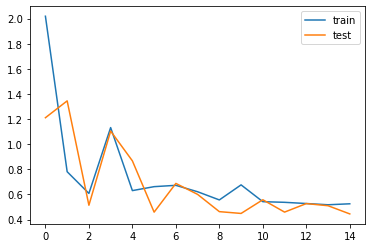

In [12]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='swish', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='swish', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='swish', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='swish'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=36, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
model.save('CNNv2')

INFO:tensorflow:Assets written to: CNNv2\assets


In [17]:
x_dfs_names = ['X Acc', 'Y Acc', 'Z Acc', 'X Gyr', 'Y Gyr', 'Z Gyr']
window_num = 11
window_num_1 = window_num - 1
window_num_2 = window_num - 2

file_names = list(os.listdir(os.getcwd() + "/TestData"))
# for i in range(int(len(file_names)/3)):
for i in range(3, 4):
    x = pd.read_csv(os.getcwd() + "\\TestData\\" + file_names[3*i], names=x_dfs_names)
    x_time = list(pd.read_csv(os.getcwd() + "\\TestData\\" + file_names[3*i+1], names=['Time'])['Time'])
    y_time = list(pd.read_csv(os.getcwd() + "\\TestData\\" + file_names[3*i+2], names=['Time'])['Time'])

    xacc = list(x['X Acc'])
    beef = list(x['Y Acc'])  # yacc
    zacc = list(x['Z Acc'])
    xgyr = list(x['X Gyr'])
    ygyr = list(x['Y Gyr'])
    zgyr = list(x['Z Gyr'])
    
    # Initialize all of these with 0 pad since they will lose a point during calculation
    xjerk = [0]
    jerky = [0]  # yjerk
    zjerk = [0]
    xangacc = [0]
    yangacc = [0]
    zangazz = [0]  #zangacc
    
    time_diff = (x_time[1]-x_time[0])
    for j in range(1, len(xacc)):
        # aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaang
        xjerk.append((xacc[j]-xacc[j-1])/time_diff)
        jerky.append((beef[j]-beef[j-1])/time_diff)  # derivative of beef = jerky
        zjerk.append((zacc[j]-zacc[j-1])/time_diff)
        xangacc.append((xgyr[j]-xgyr[j-1])/time_diff)
        yangacc.append((ygyr[j]-ygyr[j-1])/time_diff)
        zangazz.append((zgyr[j]-zgyr[j-1])/time_diff)
    
    # Padding needed for a 20 window size
    padding = [0] * 19
    xacc = padding + xacc + padding
    beef = padding + beef + padding # yacc
    zacc = padding + zacc + padding
    xgyr = padding + xgyr + padding
    ygyr = padding + ygyr + padding
    zgyr = padding + zgyr + padding
    xjerk = padding + xjerk + padding
    jerky = padding + jerky + padding  # yjerk
    zjerk = padding + zjerk + padding
    xangacc = padding + xangacc + padding
    yangacc = padding + yangacc + padding
    zangazz = padding + zangazz + padding  #zangacc
    
    xaccavg = []
    beefavg = []  # yacc
    zaccavg = []
    xgyravg = []
    ygyravg = []
    zgyravg = []
    xjerkavg = []
    jerkyavg = []  # yjerk
    zjerkavg = []
    xangaccavg = []
    yangaccavg = []
    zangazzavg = [] #zangacc
    
    xaccstd = []
    beefstd = []  # yacc
    zaccstd = []
    xgyrstd = []
    ygyrstd = []
    zgyrstd = []
    xjerkstd = []
    jerkystd = []  # yjerk
    zjerkstd = []
    xangaccstd = []
    yangaccstd = []
    zangazzstd = [] #zangacc

#     print(len(xacc)+2*window_num_1)
#     print(xacc[window_num-window_num:window_num+window_num_1])
#     print(window_num+window_num_1)
    for j in range(window_num, len(xacc)+window_num_1):
        xaccavg.append(mean(xacc[j-window_num:j+window_num_1]))
        beefavg.append(mean(beef[j-window_num:j+window_num_1]))
        zaccavg.append(mean(zacc[j-window_num:j+window_num_1]))
        xgyravg.append(mean(xgyr[j-window_num:j+window_num_1]))
        ygyravg.append(mean(ygyr[j-window_num:j+window_num_1]))
        zgyravg.append(mean(zgyr[j-window_num:j+window_num_1]))
        xjerkavg.append(mean(xjerk[j-window_num:j+window_num_1]))
        jerkyavg.append(mean(jerky[j-window_num:j+window_num_1]))
        zjerkavg.append(mean(zjerk[j-window_num:j+window_num_1]))
        xangaccavg.append(mean(xangacc[j-window_num:j+window_num_1]))
        yangaccavg.append(mean(yangacc[j-window_num:j+window_num_1]))
        zangazzavg.append(mean(zangazz[j-window_num:j+window_num_1]))

        xaccstd.append(stdev(xacc[j-window_num:j+window_num_1]))
        beefstd.append(stdev(beef[j-window_num:j+window_num_1]))
        zaccstd.append(stdev(zacc[j-window_num:j+window_num_1]))
        xgyrstd.append(stdev(xgyr[j-window_num:j+window_num_1]))
        ygyrstd.append(stdev(ygyr[j-window_num:j+window_num_1]))
        zgyrstd.append(stdev(zgyr[j-window_num:j+window_num_1]))
        xjerkstd.append(stdev(xjerk[j-window_num:j+window_num_1]))
        jerkystd.append(stdev(jerky[j-window_num:j+window_num_1]))
        zjerkstd.append(stdev(zjerk[j-window_num:j+window_num_1]))
        xangaccstd.append(stdev(xangacc[j-window_num:j+window_num_1]))
        yangaccstd.append(stdev(yangacc[j-window_num:j+window_num_1]))
        zangazzstd.append(stdev(zangazz[j-window_num:j+window_num_1]))
    
    # Additional Safe ending padding
    end_padding = [0] * window_num
    
    # For "original" features, keep a padding of 18 0's  --  two points + 18 0's are for first label
    xacc = xacc[1:] + end_padding
    beef = beef[1:] + end_padding  # yacc
    zacc = zacc[1:] + end_padding
    xgyr = xgyr[1:] + end_padding
    ygyr = ygyr[1:] + end_padding
    zgyr = zgyr[1:] + end_padding
    xjerk = xjerk[1:] + end_padding
    jerky = jerky[1:] + end_padding  # yjerk
    zjerk = zjerk[1:] + end_padding
    xangacc = xangacc[1:] + end_padding
    yangacc = yangacc[1:] + end_padding
    zangazz = zangazz[1:] + end_padding  #zangacc
    
    # Padding for average and stdev features
    padding2 = [0] * window_num_2
    xaccavg = padding2 + xaccavg + end_padding
    beefavg = padding2 + beefavg + end_padding  # yacc
    zaccavg = padding2 + zaccavg + end_padding
    xgyravg = padding2 + xgyravg + end_padding
    ygyravg = padding2 + ygyravg + end_padding
    zgyravg = padding2 + zgyravg + end_padding
    xjerkavg = padding2 + xjerkavg + end_padding
    jerkyavg = padding2 + jerkyavg + end_padding  # yjerk
    zjerkavg = padding2 + zjerkavg + end_padding
    xangaccavg = padding2 + xangaccavg + end_padding
    yangaccavg = padding2 + yangaccavg + end_padding
    zangazzavg = padding2 + zangazzavg + end_padding #zangacc
    
    xaccstd = padding2 + xaccstd + end_padding
    beefstd = padding2 + beefstd + end_padding  # yacc
    zaccstd = padding2 + zaccstd + end_padding
    xgyrstd = padding2 + xgyrstd + end_padding
    ygyrstd = padding2 + ygyrstd + end_padding
    zgyrstd = padding2 + zgyrstd + end_padding
    xjerkstd = padding2 + xjerkstd + end_padding
    jerkystd = padding2 + jerkystd + end_padding  # yjerk
    zjerkstd = padding2 + zjerkstd + end_padding
    xangaccstd = padding2 + xangaccstd + end_padding
    yangaccstd = padding2 + yangaccstd + end_padding
    zangazzstd = padding2 + zangazzstd + end_padding #zangacc
    
    X_data_test = []
    y_data = []
#     print(xacc[window_num_1-window_num_1:window_num_1+window_num])
#     print(xacc[4*len(y_time)+window_num_2-window_num_1:4*len(y_time)+window_num_2+window_num])
    for j in range(window_num_1, 4*len(y_time)+window_num_1, 4):
        new_img = np.column_stack([xacc[j-window_num_1:j+window_num], beef[j-window_num_1:j+window_num], 
                                   zacc[j-window_num_1:j+window_num], xgyr[j-window_num_1:j+window_num], 
                                   ygyr[j-window_num_1:j+window_num], zgyr[j-window_num_1:j+window_num], 
                                   xjerk[j-window_num_1:j+window_num], jerky[j-window_num_1:j+window_num], 
                                   zjerk[j-window_num_1:j+window_num], xangacc[j-window_num_1:j+window_num], 
                                   yangacc[j-window_num_1:j+window_num], zangazz[j-window_num_1:j+window_num], 
                                   xaccavg[j-window_num_1:j+window_num], beefavg[j-window_num_1:j+window_num], 
                                   zaccavg[j-window_num_1:j+window_num], xgyravg[j-window_num_1:j+window_num], 
                                   ygyravg[j-window_num_1:j+window_num], zgyravg[j-window_num_1:j+window_num], 
                                   xjerkavg[j-window_num_1:j+window_num], jerkyavg[j-window_num_1:j+window_num], 
                                   zjerkavg[j-window_num_1:j+window_num], xangaccavg[j-window_num_1:j+window_num], 
                                   yangaccavg[j-window_num_1:j+window_num], zangazzavg[j-window_num_1:j+window_num], 
                                 xaccstd[j-window_num_1:j+window_num], beefstd[j-window_num_1:j+window_num], 
                                   zaccstd[j-window_num_1:j+window_num], xgyrstd[j-window_num_1:j+window_num], 
                                 ygyrstd[j-window_num_1:j+window_num], zgyrstd[j-window_num_1:j+window_num], 
                                   xjerkstd[j-window_num_1:j+window_num], jerkystd[j-window_num_1:j+window_num], 
                                 zjerkstd[j-window_num_1:j+window_num], xangaccstd[j-window_num_1:j+window_num], 
                                   yangaccstd[j-window_num_1:j+window_num], zangazzstd[j-window_num_1:j+window_num]])
        X_data_test.append(new_img)
    X_data_test = np.array(X_data_test)
    X_data_test = X_data_test.reshape(X_data_test.shape[0], X_data_test.shape[1], X_data_test.shape[2], 1)
    
expected = model.predict(X_data_test, verbose=1)

expected_final = []
for i in range(len(y_time)):
    expected_final.append(np.argmax(expected[i]))
    
print(Counter(expected_final))
output_df = pd.DataFrame(expected_final)
output_df.to_csv('subject_012_01__y_prediction.csv')

355/355 [==============================] - 30s 84ms/step
Counter({0: 9220, 2: 886, 1: 762, 3: 462})
